<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>

![**Classificação da Qualidade de Vinhos**](https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main//wine_image.jpeg?raw=true)


# **Introdução**

### **Definição do Problema:**

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste na avaliação de vinhos produzidos mundialmente. O objetivo principal é classificar o Rotuno do Vinho com com base em quatro características : acidez, residuo de açucar,	nivel alcolico	e densidade.


**Tipo de Problema**

**classificação supervisionada**  (Baixa, Média ou Alta Qualidade).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre nacidez e nivel alcolico ?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

******************************************

## **Estrutura do projeto:**
[**1. Importação das Bibliotecas**](#1)

>[**Step 01: Importação das Bibliotecas**](#1)

[**2. Carga dos Dados**](#1)

>[**Step 01: Carga de Dados**](#1)

[**3. Analise de Dados:**](#1)

>[**3.1 - Exploração Inicial**](#1)

>>[**Step 01: Dimensões do Dataset**](#1)

>>[**Step 02: Informações do DataSet**](#1)

>>[**Step 03: Amostra de Dados**](#1)

>>[**Step 04: Datatypes do DataSet**](#1)

>>[**Step 05: Estatísticas Descritivas**](#1)

>>[**Step 06: Distribuição de Classes**](#1)

>[**3.2 - Exploração com Visualizações**](#1)

>>[**3.2.1. Visualizações Unimodais:**](#1)

>>>[**Step 01: Histograma**](#1)

>>>[**Step 02: Boxplot**](#1)

>>>[**Step 03: Gráfico de Densidade**](#1)

>>>[**Step 04: Histograma + KDE**](#1)

>>[**3.2.2. Visualizações Multimodais:**](#1)

>>>[**3.2.2.1. Visualizações Multimodais - Numérica × Numérica**](#1)

>>>>[**Step 01: Scatter Plot**](#1)

>>>>[**Step 02: Pairplot**](#1)

>>>>[**Step 03: Heatmap de Correlação**](#1)

>>>[**3.2.2.2. Visualizações Multimodais - Categórica × Numérica**](#1)

>>>>[**Step 01: Boxplot por Categoria (quality_label)**](#1)

>>>>[**Step 02: Violin Plot**](#1)

>>>>[**Step 03: Barplot (média de preço por qualidade)**](#1)

>>>>[**Step 04: Swarm Plot**](#1)

>>>[**3.2.2.3. Visualizações Multimodais - Categórica × Categórica**](#1)

>>>>[**Step 01: Countplot com hue**](#1)

>>>>[**Step 02: Crosstab + Heatmap**](#1)

[**4. Pré Processamento de Dados:**](#1)

>[**4.1.Limpeza**](#1)

>>[**Step 01: Identificação de Nulos**](#1)

>>[**Step 02: Remoção de Linhas Nulas**](#1)

>>[**Step 03: Identificação de Nulos**](#1)

>>[**Step 04: Preenchermento de Valores**](#1)

>>[**Step 05: Identificação de Nulos**](#1)

>>[**Step 06: Atualização do DataSet Original**](#1)

>>[**Step 07: Redundancias**](#1)

>>[**Step 08: Outliers**](#1)

>[**4.2 Preparação e Transformação de dados**](#1)

>>[**Step 01: Novas Caracteristicas**](#1)

>>[**Step 02: Redução de Dimensionalidade**](#1)

>>[**Step 03: Categorização de Variáveis**](#1)

>>[**Step 04: Normalização**](#1)

>>[**Step 05 Visualização da distribuição após a normalização**](#1)

>>[**Step 06: Divisão do Conjunto de Dados**](#1)

[**5. Conclusão**](#1)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

# Step 01: Importação das Bibliotecas



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>


Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Kaggle: https://www.kaggle.com/datasets. Foram coletados dados de rotulos de vinhos, com o objetivo de realização de uma classificação dos Rotulos de acordo com as sua variaveis dipostas no dataset.

# Step 01: Carga de Dados



In [6]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Analise_de_Dados/refs/heads/main/winemag-data_first25k_v3.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)



# Exibir as primeiras linhas do DataFrame
df.head()



,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,13964,Chile,"Kind of dull on the nose, with white pepper bu...",NaN,5.0,"28,4",NaN,NaN,NaN,NaN,NaN,"6,7","12,1","8,4","0,9946",low
1,14011,France,Marked by soft tannins yet surprisingly crisp ...,NaN,5.0,"28,2",NaN,NaN,NaN,NaN,NaN,"8,8","4,3","8,2","0,9967",low
2,14035,Argentina,"Giant and black, with extracted but pruney aro...",NaN,5.0,"28,1",NaN,NaN,NaN,NaN,NaN,"11,3","5,9","8,1","0,9923",low
3,14100,US,This bottling resembles the New Zealand paradi...,NaN,5.0,"28,6",NaN,NaN,NaN,NaN,NaN,"4,4","8,3","8,6","0,9911",low
4,14488,Spain,"A ripe and rich style, with black cherry, rais...",NaN,5.0,"28,1",NaN,NaN,NaN,NaN,NaN,"6,7","6,5","8,1","0,9947",low


In [7]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 25099 linhas e 16 colunas.


In [8]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
id,object
country,object
description,object
designation,object
points,float64
price,object
province,object
region_1,object
region_2,object
variety,object


In [9]:
# Conversão de colunas numéricas que estão como objeto
numeric_object_cols = ['price','fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in numeric_object_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# remove a coluna de controle ID , para que nao seja considerada como dato de negócio
df = df.drop(columns='id')

#Mostra o resumo das informações estruturais do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25099 entries, 0 to 25098
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          25001 non-null  float64
 4   price           25001 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.9+ MB
None


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Analise de Dados:</p>

Nessa etapa de Análise de Dados, também chamada de análise exploratória de dados ou Exploratory Data Analysis – EDA vamos entender, resumir e visualizar os dados antes da modelagem ou tomada de decisão.

# 3.1. Exploração Inicial

# Step 01: Dimensões do Dataset

In [10]:
print("Informações do Dataframe:")

linhas, colunas = df.shape
print(f"🔢 Total de linhas: {linhas}")
print(f"🧱 Total de colunas: {colunas}")


Informações do Dataframe:
🔢 Total de linhas: 25099
🧱 Total de colunas: 15


# Step 02: Informações do DataSet

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25099 entries, 0 to 25098
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          25001 non-null  float64
 4   price           25001 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.9+ MB
None


# Step 03: Amostra de Dados

In [12]:
print("="*50)
print("Amostra das 10 Primeiras linhas do DataFrame")
print("="*50)
df.head(10)




Amostra das 10 Primeiras linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,Chile,"Kind of dull on the nose, with white pepper bu...",NaN,5.0,28.4,NaN,NaN,NaN,NaN,NaN,6.7,12.1,8.4,0.9946,low
1,France,Marked by soft tannins yet surprisingly crisp ...,NaN,5.0,28.2,NaN,NaN,NaN,NaN,NaN,8.8,4.3,8.2,0.9967,low
2,Argentina,"Giant and black, with extracted but pruney aro...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,11.3,5.9,8.1,0.9923,low
3,US,This bottling resembles the New Zealand paradi...,NaN,5.0,28.6,NaN,NaN,NaN,NaN,NaN,4.4,8.3,8.6,0.9911,low
4,Spain,"A ripe and rich style, with black cherry, rais...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,6.7,6.5,8.1,0.9947,low
5,South Africa,"Fresh grass, vibrant citrus and tart gooseberr...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,5.3,6.3,8.1,10013.0000,low
6,US,Sometimes a reserve designation on a Chardonna...,NaN,5.0,28.9,NaN,NaN,NaN,NaN,NaN,9.4,4.7,8.9,0.9949,low
7,France,There's a strong mineral backbone to this wine...,NaN,5.0,28.7,NaN,NaN,NaN,NaN,NaN,9.9,13.6,8.7,0.9902,low
8,France,The fact that this wine comes from the chalkie...,NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,7.1,7.5,8.1,0.9959,low
9,Spain,"Chunky and chocolaty on the nose, with aromas ...",NaN,5.0,28.5,NaN,NaN,NaN,NaN,NaN,14.3,1.0,8.5,0.9943,low


In [13]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
df.tail(10)

Amostra das 10 ultimas linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
25089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 04: Datatypes do DataSet

In [14]:
print("="*40)
print("📊 Informações sobre o DataFrame")
print("="*40)


print("\n Tipos de dados (dtypes) do dataset: \n")
print(df.dtypes)

📊 Informações sobre o DataFrame

 Tipos de dados (dtypes) do dataset: 

country            object
description        object
designation        object
points            float64
price             float64
province           object
region_1           object
region_2           object
variety            object
winery             object
fixed_acidity     float64
residual_sugar    float64
alcohol           float64
density           float64
quality_label      object
dtype: object


# Step 05: Estatísticas Descritivas

In [15]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)
df.describe()

📊 Resumo Estatistico


,points,price,fixed_acidity,residual_sugar,alcohol,density
count,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000
mean,65.099476,966.460618,10.174265,7.691948,11.040002,3095.600048
std,23.299921,794.509872,3.450971,4.206823,1.759477,4604.346069
min,5.000000,28.000000,4.000000,0.500000,8.000000,0.990000
25%,44.000000,209.370000,7.100000,4.100000,9.500000,0.993900
50%,47.000000,254.180000,10.400000,7.500000,11.000000,0.997400
75%,88.000000,1736.430000,13.100000,11.500000,12.600000,10008.000000
max,100.000000,2587.380000,16.000000,15.000000,14.000000,10049.000000


📊 Resumo Estatistico


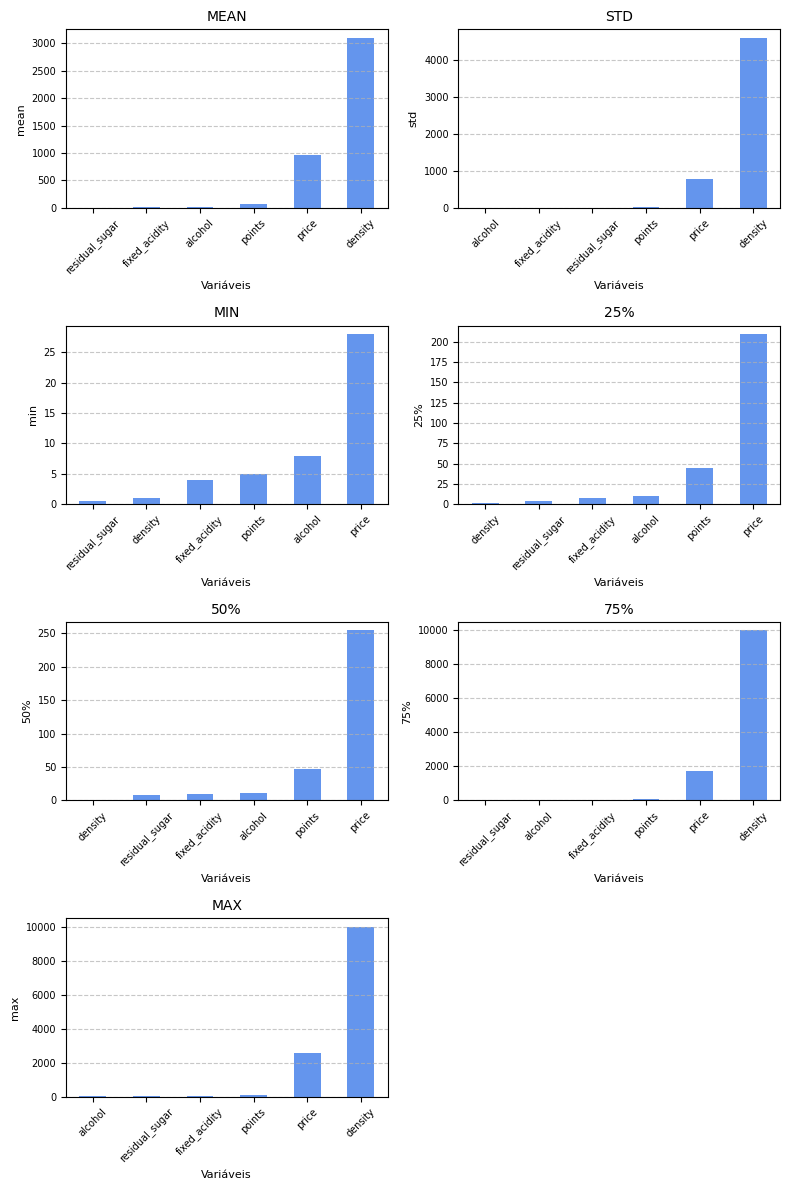

In [16]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)

stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estatisticas = stats.columns.tolist()

# Número de gráficos e layout (2 por linha)
num_graficos = len(estatisticas)
linhas = (num_graficos + 1) // 2  # arredonda pra cima
fig, axs = plt.subplots(linhas, 2, figsize=(8, linhas * 3))  # largura fixa, altura proporcional


axs = axs.flatten()  # facilitar iteração

for i, stat in enumerate(estatisticas):
    stats[stat].sort_values().plot(kind='bar', color='cornflowerblue', ax=axs[i])
    axs[i].set_title(stat.upper(), fontsize=10)
    axs[i].set_ylabel(stat, fontsize=8)
    axs[i].set_xlabel('Variáveis', fontsize=8)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45, labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

# Remover qualquer eixo vazio (se número ímpar)
if num_graficos % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Step 06: Média

In [17]:
#codigo

# Step 07: Desvio Padrão

In [18]:
#codigo

# Step 08: Distribuição de Classes

📊 Distribuição de Classes


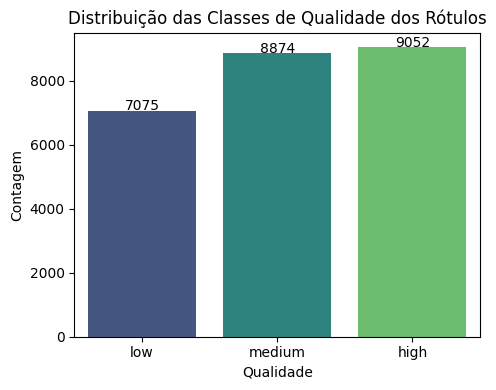

In [19]:
print("="*40)
print("📊 Distribuição de Classes")
print("="*40)

# Agrupamento das classes
class_counts = df['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Plot
plt.figure(figsize=(5, 4))

ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)

# Título e eixos
plt.title('Distribuição das Classes de Qualidade dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Adiciona os valores nas barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3.2. Exploração com Visualizações


> # 3.2.1. Visualizações Unimodais:


Nessa etapa vamos ver a distribuição dos dados por meio de Visualizações unimodais,  que são gráficos em que se observa uma única moda, uma única concentração central na distribuição dos valores.

>># Step 01: Histograma

Nesse step vamos observar por meio de histograma a distribuição de cada atributo do dataset.

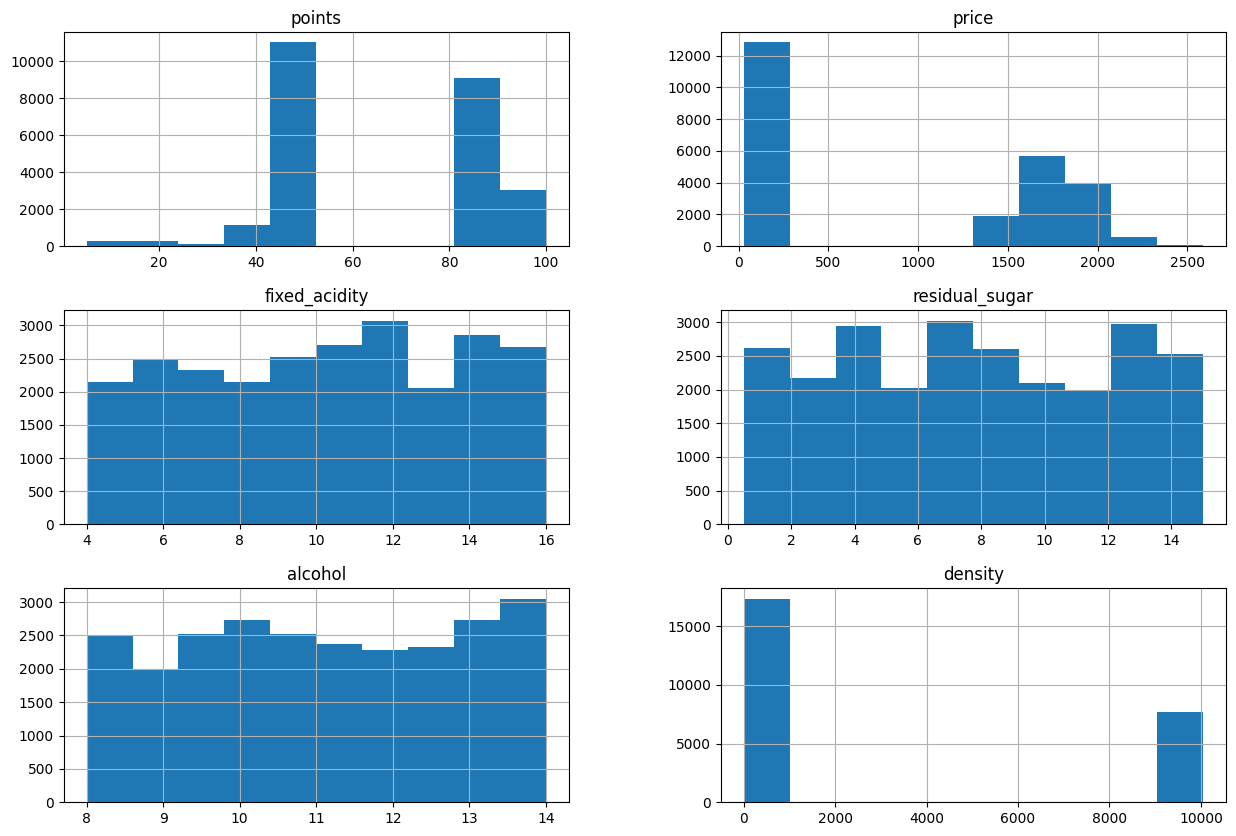

In [20]:
df.hist(figsize = (15,10))
plt.show()

**Conclusão:**

O dado price e density precisam ser verificados e tratados, avaliaremos a remoção ou transformação de outliers.

Os dados points, alcohol, fixed_acidity e residual_sugar parecem estar em condições boas para análise.

>># Step 02: Boxplot

Nesse step vamos observar por meio de graficos Boxpot a distribuição de cada atributo do dataset.

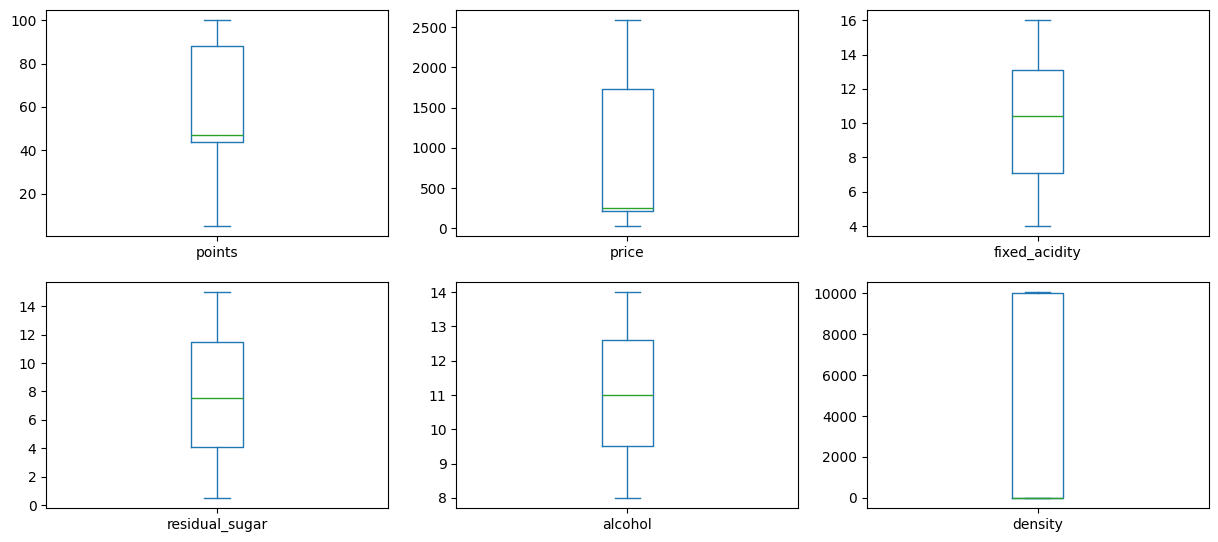

In [21]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Conclusão:**

points, fixed_acidity e alcohol apresentam distribuições coerentes e poucos outliers, logo estão adequadas para análise.

residual_sugar apresenta  uma alta variação.

price: apresenta muitos outliers e valores extremamente altos (até 20.000), que podem gerar problemas nas análises.

density: valores incoerentes, chegando a 10.000, pode indicar escalas fora de padrão e isso requer limpeza.

>># Step 03: Gráfico de Densidade

Nesse step vamos ver os gráficos de densidade, para ver a distribuição probabilística contínua de uma variável. podemos verificar onde os dados estão mais concentrados e como se distribuem ao longo do eixo dos valores.

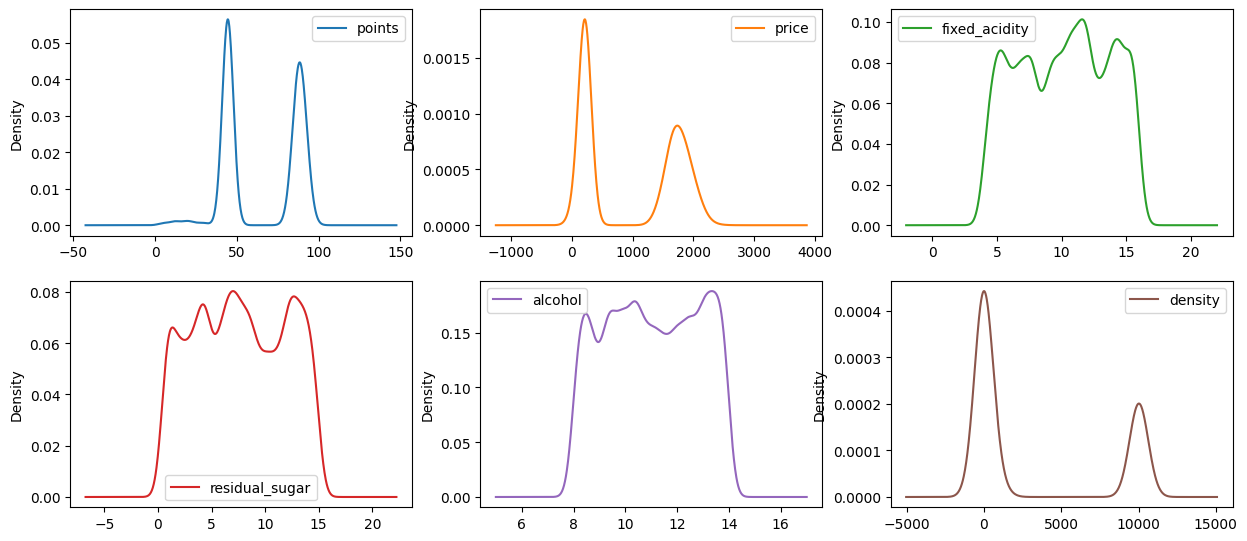

In [22]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

**Conclusão:**

Variável price tem caracteristicas de ser unimodal, embora assimétrica.

As outras variaveis bimodais ou multimodais, a variavel density provavelmente vai precisar de precisa de limpeza, apresenta um um pico de escala e uma baixa frequencia.

>># Step 04: Histograma + KDE

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuem e onde se concentram. Esse tipo de grafico é ideal para Detectar padrões, Avaliar necessidade de transformações e Decidir se vale a pena segmentar os dados.

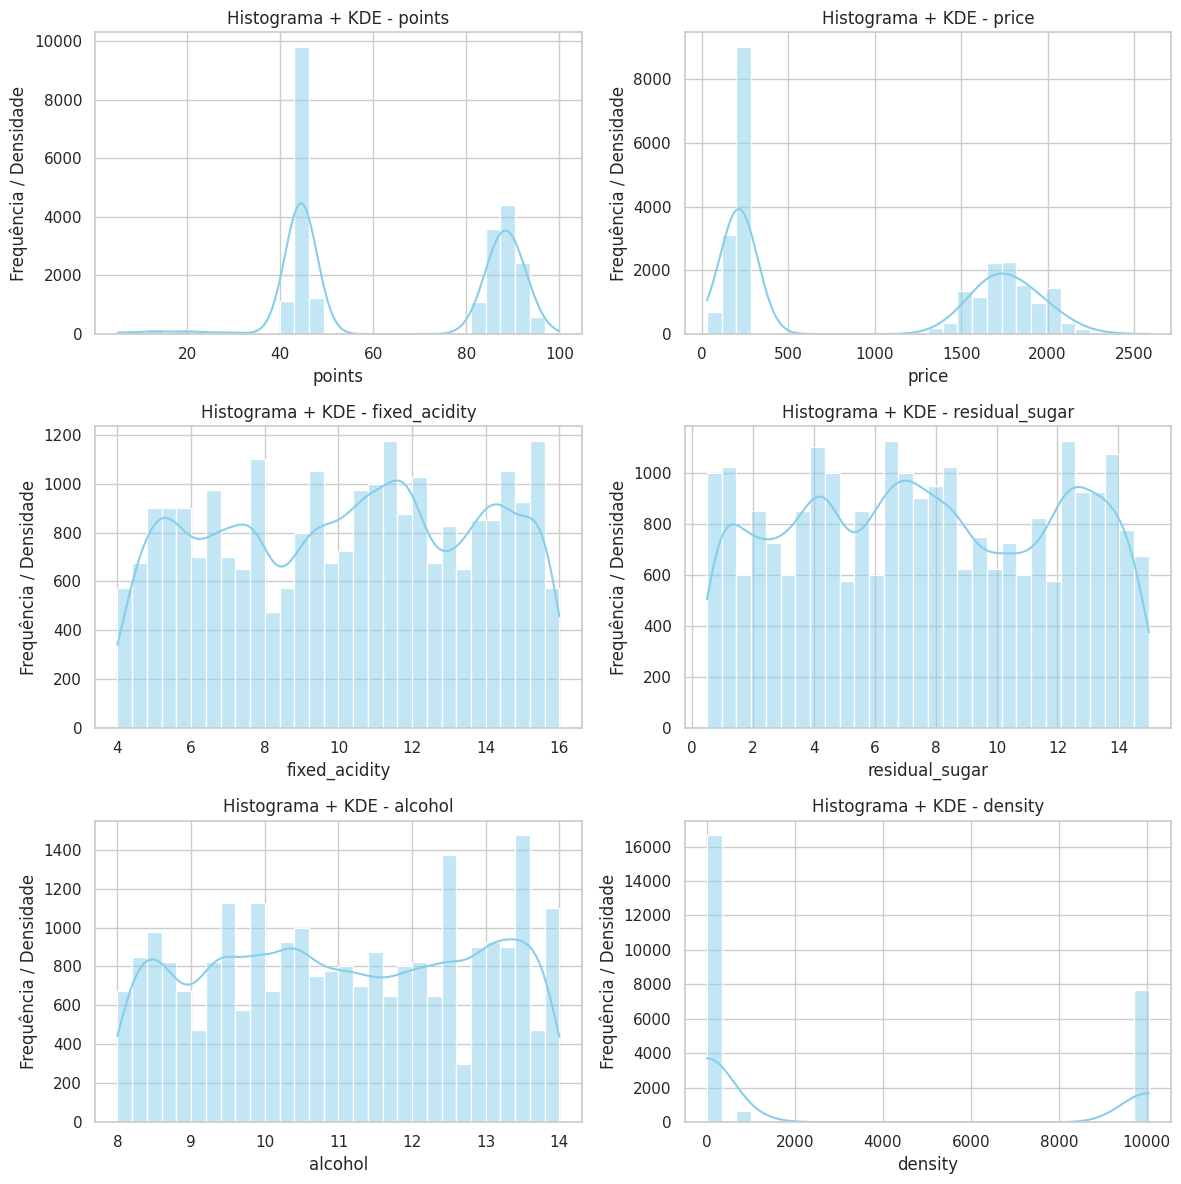

In [23]:
sns.set(style="whitegrid")

# Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Configura o layout do grid
n_cols = 2  # dois por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Loop para gerar cada histograma com KDE
for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma + KDE - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência / Densidade')

# Remove subplots vazios (caso o número de colunas não seja par)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Conclusão:**

Variaveis points e price tem caracteristicas unimodal.

As outras variáveis apresentam multimodalidade, necessidade de segmentação antes da modelagem.

A variavel density requer tratamento nos valores, pois apresenta escala fora de padrão.



> # 3.2.2 Visualizações Multimodais:

Nessa etapa vamos trabalhar com graficos multimodais que mostram distribuições de dados com dois ou mais picos. Esses picos representam valores ou intervalos onde os dados são mais frequentes.

Vamos trabalhasr com a variaveis abaixo que apresentam picos múltiplo:

fixed_acidity, residual_sugar e alcohol


>> # 3.2.2.1. Visualizações Multimodais - Numérica × Numérica

> # Step 01:  Scatter Plot

Neste step, vamos utilizar o gráfico um dispersão scatter plot para analisar visualmente a relação entre duas variáveis numéricas do dataset. Com o objetivo de entender como as variáveis se relacionam entre si, identificar padrões e comportamentos que podem ser relevantes para análises futuras e para o treinamento de modelos preditivos.

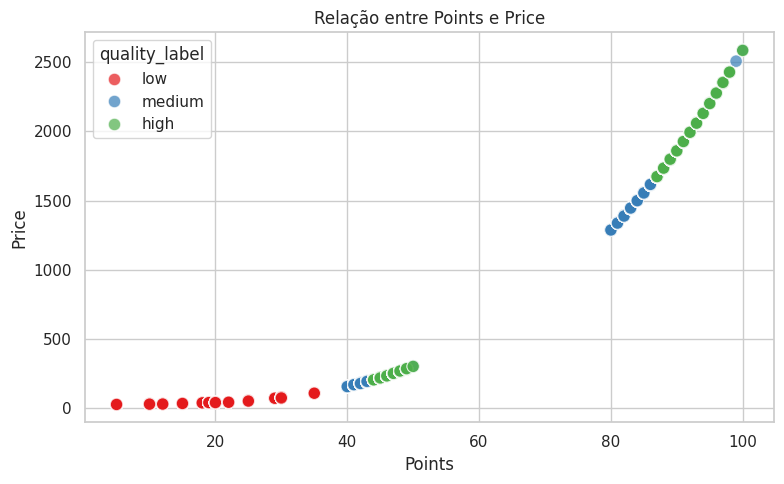

In [ ]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='points',
    y='price',
    hue='quality_label',
    palette='Set1',
    s=80,
    alpha=0.7
)

plt.title('Relação entre Points e Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Conclusão:**

Há uma relação positiva entre a nota (Points) e o preço (Price) dos vinhos, mas essa relação é fraca e sujeita a muita variação. As classes de qualidade não estão bem separadas visualmente, o que indica que outros fatores devem ser considerados para uma boa classificação.

> # Step 02: Pairplot

Nesse Step vamos usar uma visualização que mostra gráficos de dispersão para todas as combinações possíveis entre variáveis numéricas de um dataset.
Também exibe, na diagonal, a distribuição de cada variável em forma de histograma ou KDE.



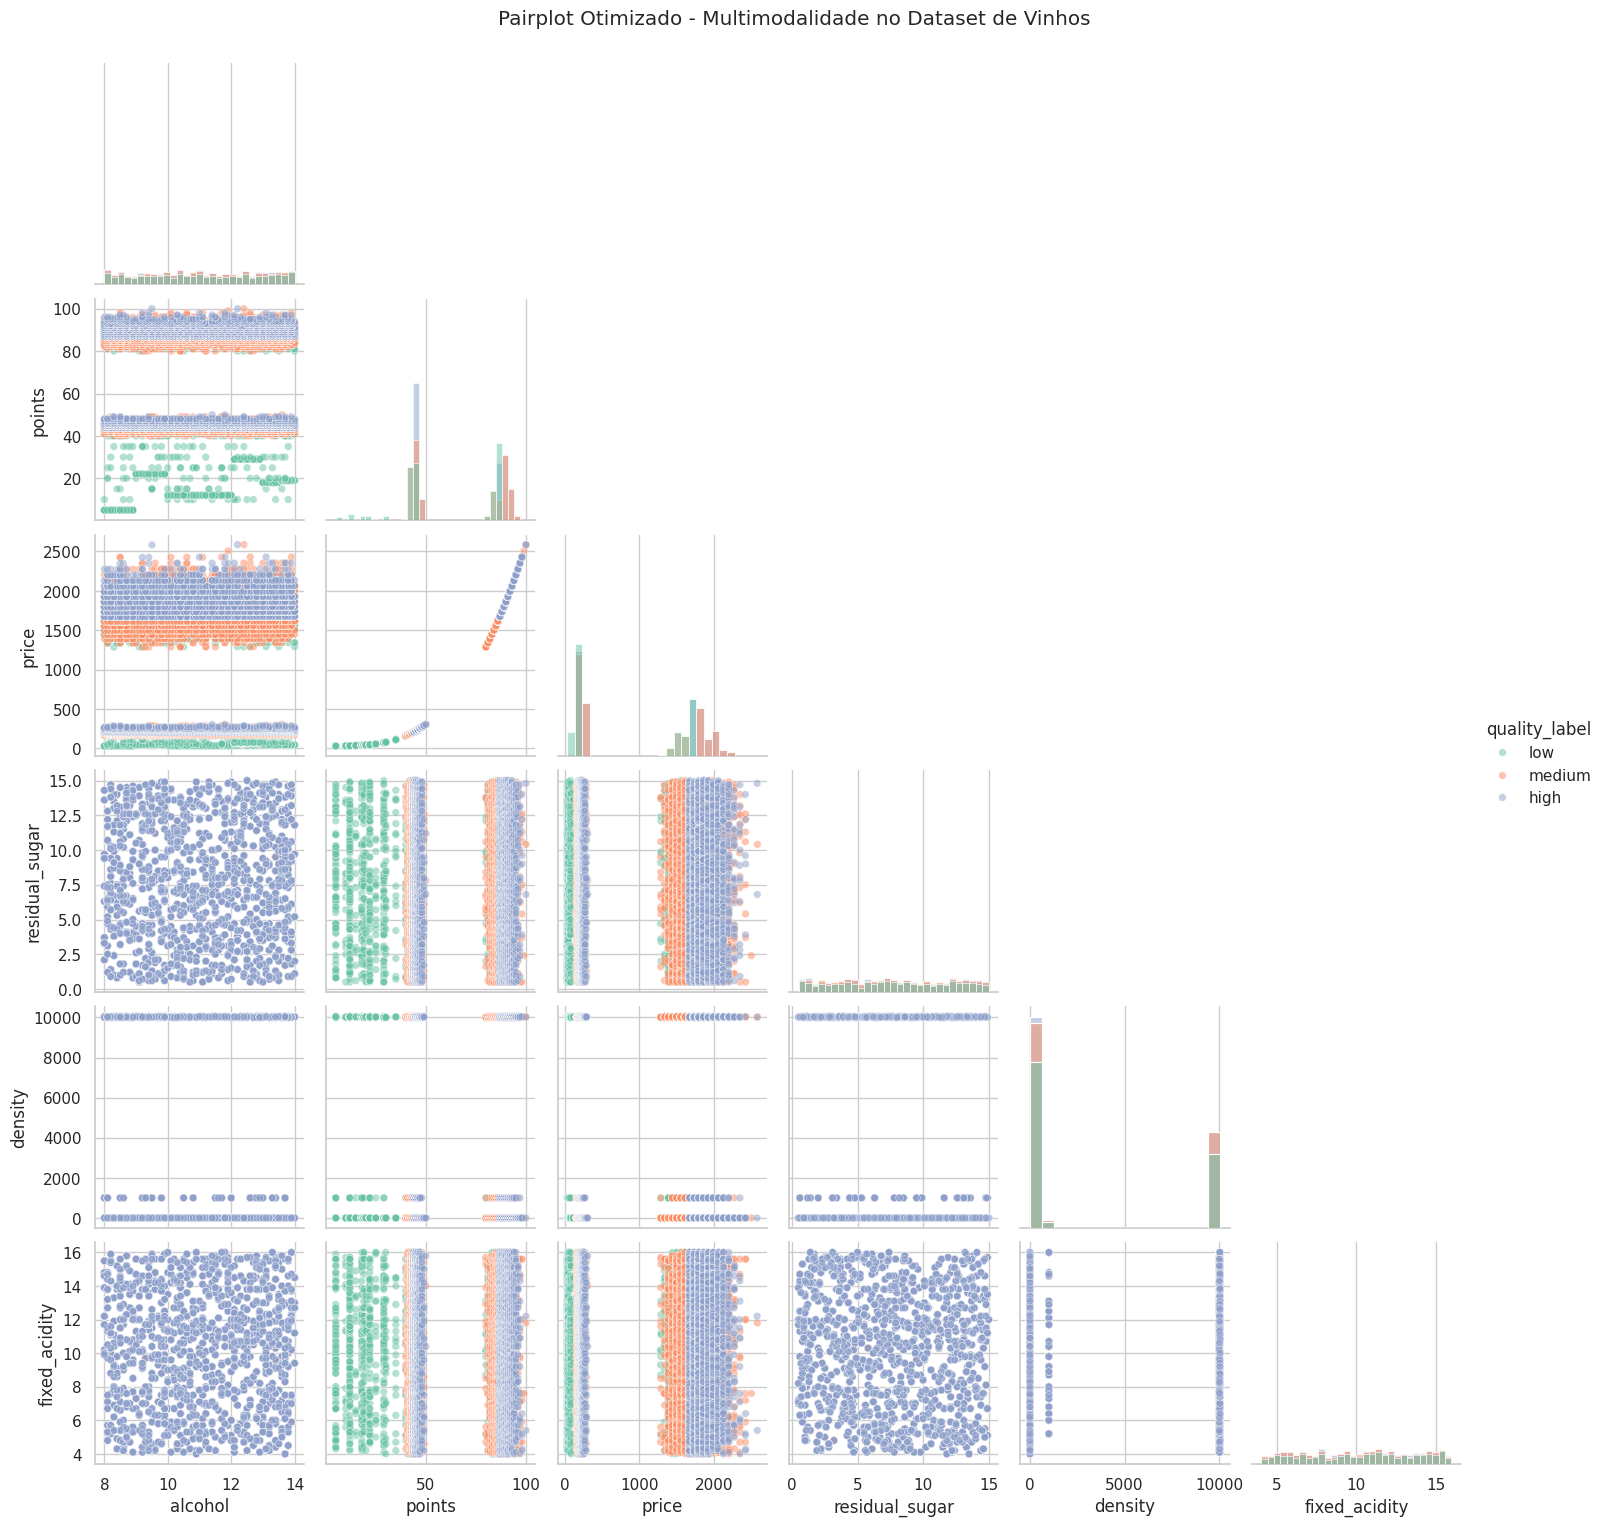

In [ ]:
# Amostragem
#sample_df = df.sample(n=1000, random_state=42)

# Selecionar variáveis mais relevantes + variável categórica
cols = ['alcohol', 'points', 'price','residual_sugar','density','fixed_acidity']
sample_df = df[cols + ['quality_label']]

# Pairplot otimizado
sns.pairplot(
    sample_df,
    hue='quality_label',
    diag_kind='hist',  # mais leve que 'kde'
    palette='Set2',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 30}  # pontos menores e mais leves
)
plt.suptitle('Pairplot Otimizado - Multimodalidade no Dataset de Vinhos', y=1.02)
plt.show()

**Conclusão:**

A variável alcohol apresenta distribuições distintas entre os grupos de qualidade dos rotulos. Podemos observar que pelos dados coletados, vinhos com mais álcool estão relacionados a rotulos com maior qualidade.

A variável density apresenta distorções com valores extremos, o que faz com que esse dataser precise passar pela eliminações de outliers. Podemos observar valores totalmente fora da escala,  10.000+, onde o intervalo normal está entre 0.98 a 1.05.

As variáveis residual_sugar e fixed_acidity não definem bem as classes, o que não ajuda muito a identificar a qualidade do rotulo.

> # Step 03: Heatmap de Correlação

Nesse step , vamos usar uma visualização que mostra o nível de correlação entre variáveis numéricas. Cada célula do gráfico representa o valor da correlação (geralmente de -1 a 1) entre duas variáveis, com cores diferentes indicando a força e direção da relação.

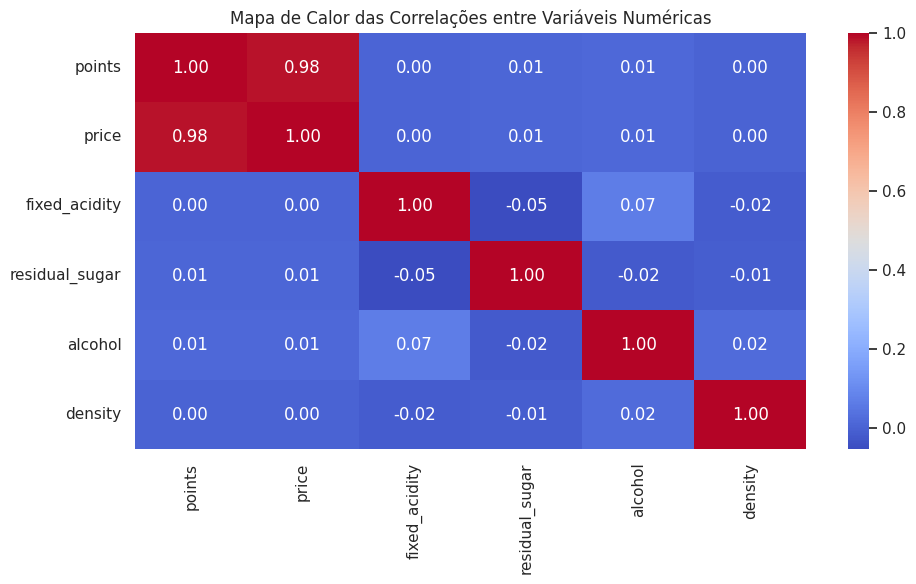

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

**Conclusão:**

A correlação mais relevante observada está entre points e price, com valor de 0.43, indicando que vinhos mais bem avaliados tendem a ser mais caros.

As variáveis fixed_acidity, residual_sugar, alcohol, density apresentam correlações muito fracas entre si e com points ou price.

Podemos analisar que não existe relações lineares fortes entre a maioria das variáveis, o que dificulta as análises baseadas em correlação.

>> # 3.2.2.2. Visualizações Multimodais - Categórica × Numérica

> # Step 01: Boxplot por Categoria (quality_label)

Nesse step temos um grafico boxplot por categoria que mostra a distribuição de uma variável numérica.Estamos comparando a distribuição dessa variável para diferentes valores de categorias.

essa visualização tem como objetivo:

*   Comparar a dispersão e mediana da variável numérica entre as categorias.
*   Identificar diferenças, assimetrias, e possíveis outliers em cada grupo.
*   Facilitar a visualização para análises exploratórias.



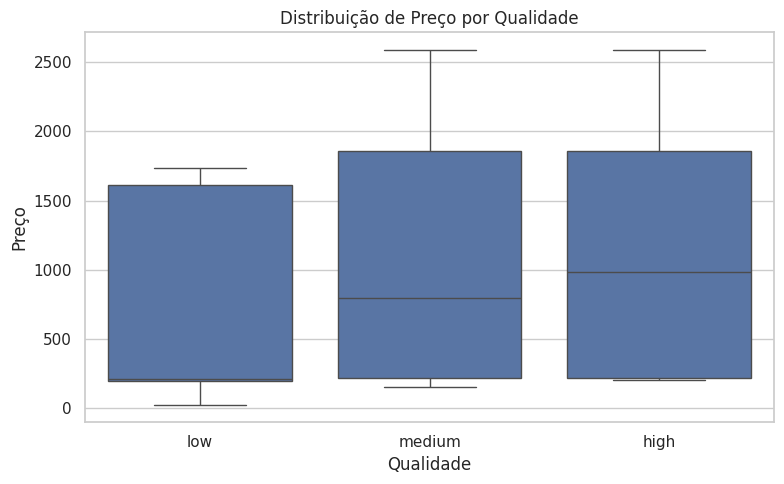

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'])
plt.title('Distribuição de Preço por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

**Conclusão:**

A mediana do preço é parecida entre as três categorias de qualidade.

Existem outliers nas categorias, principalmente na categoria high, com um valor acima de 20.000, o que gera uma distorção da relação.

A distribuição dos preços é semelhante entre os grupos, sem diferença clara entre categorias de qualidade.

Indicação que a variável "Qualidade" não é um bom discriminador de preço nesse conjunto de dados.

> # Step 02: Violin Plot

Nesse step vamos usar uma visualização que combina o boxplot com um gráfico de densidade (KDE). Ideal para mostra a distribuição da variável numérica por categoria, a forma da distribuição e a mediana e quartis, como no boxplot. Tem como objetivo visualizar como os valores estão distribuídos dentro de cada categoria.

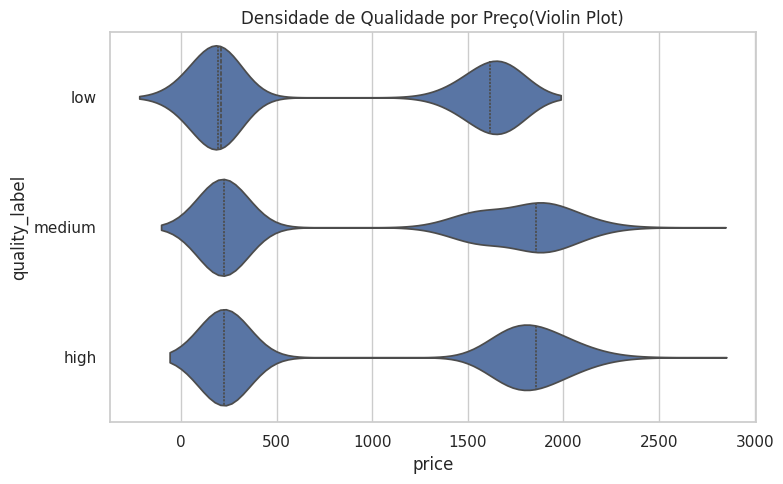

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='price', y='quality_label', order=['low', 'medium', 'high'], inner='quartile')
plt.title('Densidade de Qualidade por Preço(Violin Plot)')
plt.tight_layout()
plt.show()

**Conclusão:**

A qualidade mencionadas low, medium, high não apresentam variação relevante na distribuição de preços. Reforça a conclusão que a qualidade "quality_label" não é um bom preditor para "price" nesse conjunto de dados.

> # Step 03: Barplot com agregações

Nesse step vamos usar  Barplot com agregações que mostra uma média de uma variável numérica para cada categoria.

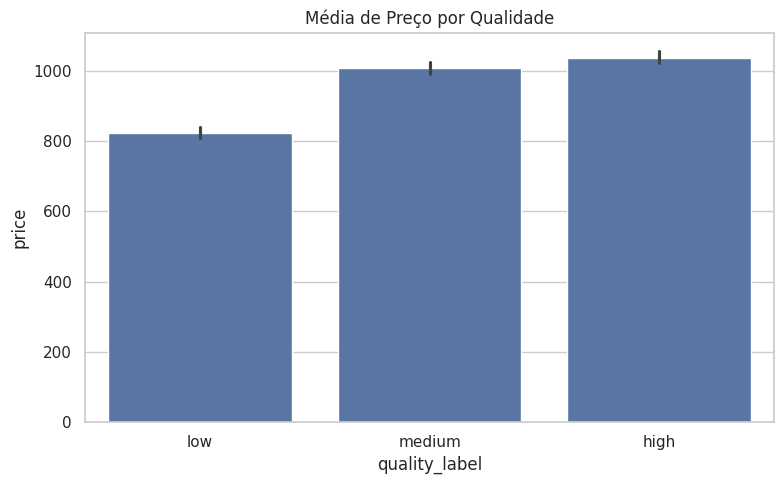

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Preço por Qualidade')
plt.tight_layout()
plt.show()

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 04: Swarm Plot

Nesse step vamos usar um gráfico que mostra pontos individuais de dados numa dimensão categórica, onde cada ponto representa uma observação, e os pontos são posicionados de forma a não se sobrepor.

Inidcado para visualizar a distribuição real dos dados por categoria, identificando agrupamentos, outliers e multimodalidades.

**Foi usado uma amostra dos dados em função de performance**

**Recomendado não executar , pois o tempo de processamento é bem alto. O resultado do código foi anexado de forma estatica (imagem).**

In [ ]:
# Ocultar todos os warnings
#warnings.filterwarnings('ignore')

#sns.swarmplot(
#    data=df.sample(n=5000, random_state=42),
#    x='quality_label',
#    y='price',
#    order=['low', 'medium', 'high'],
#    size=1.2,
#    alpha=0.5
#)
#plt.title('Preço por Qualidade (Swarm Plot)')
#plt.tight_layout()
#plt.show()




![**Classificação da Qualidade de Vinhos**](https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main//swarm.jpeg?raw=true)

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

>> # 3.2.2.3. Visualizações Multimodais - Categórica × Categórica

> # Step 01: Countplot com hue

Nesse step xxxxxx

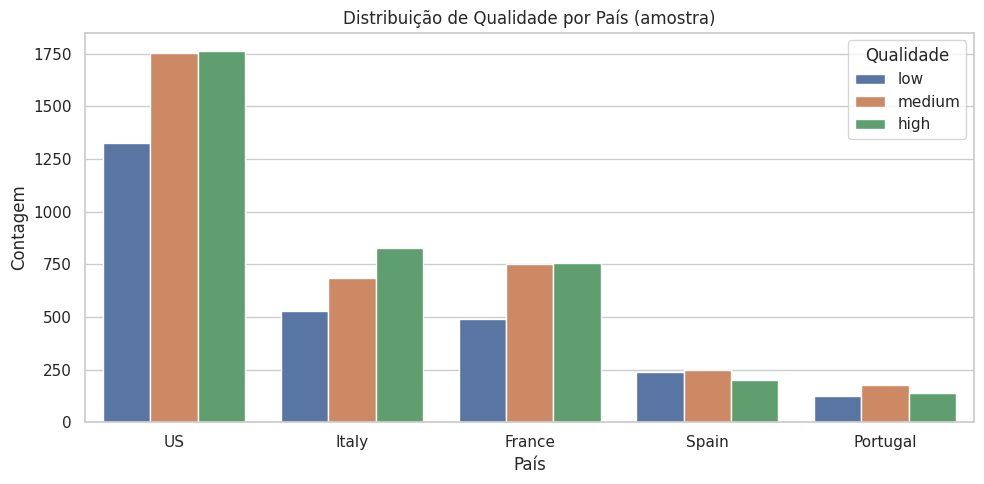

In [ ]:
top_paises = df['country'].value_counts().index[:5]
df_top = df[df['country'].isin(top_paises)].sample(n=10000, random_state=42)  # ajustável

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x='country', hue='quality_label', order=top_paises,
              hue_order=['low', 'medium', 'high'])
plt.title('Distribuição de Qualidade por País (amostra)')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Qualidade')
plt.tight_layout()
plt.show()

**Conclusão : **

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 02: Crosstab + Heatmap

Nesse step xxxxxx

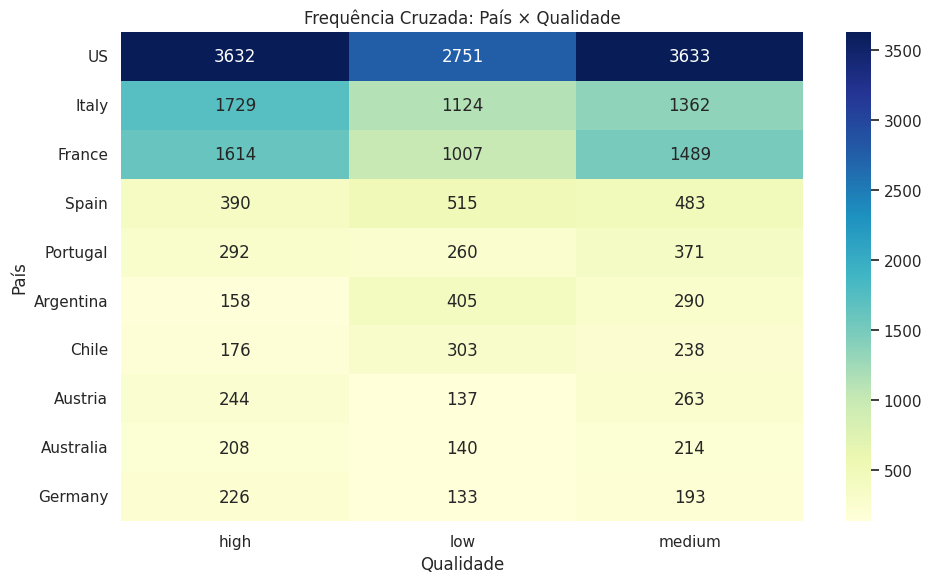

In [ ]:
crosstab = pd.crosstab(df['country'], df['quality_label'])
top_crosstab = crosstab.loc[crosstab.sum(axis=1).nlargest(10).index]

plt.figure(figsize=(10, 6))
sns.heatmap(top_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequência Cruzada: País × Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('País')
plt.tight_layout()
plt.show()

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Pré Processamento de Dados:</p>

# 4.1 Limpeza

Nesta etapa, vamos fazer a limpeza dos dados para garantir a qualidade do dataset.

vamos Remover linhas e colunas com valores ausentes,Tratar valores nulos, Corrigir inconsistências e erros nos dados e identificar e tratar dados redundantes e outliers.

Com o objetivo de deixar o conjunto de dados limpo, consistente e pronto para análise e modelagem.

> # Step 01: Identificação de Nulos

Neste passo, vamos identificar os valores ausentes (nulos) em cada variável do dataset, após a remoção das linhas completamente vazias.
vamos analisar os maiores problemas de ausencia de dados no dataset, para que possamos decidir, no próximo passo, como tratar esses valores ausentes preenchimento, exclusão ou outra estratégia.

In [24]:
# Total e percentual de valores ausentes por coluna
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
region_2                 15688   62.504482
designation               7920   31.555042
region_1                  4590   18.287581
province                   822    3.275031
variety                    820    3.267062
winery                     820    3.267062
country                    100    0.398422
points                      98    0.390454
price                       98    0.390454
description                 98    0.390454
fixed_acidity               98    0.390454
residual_sugar              98    0.390454
alcohol                     98    0.390454
density                     98    0.390454
quality_label               98    0.390454


<Axes: >

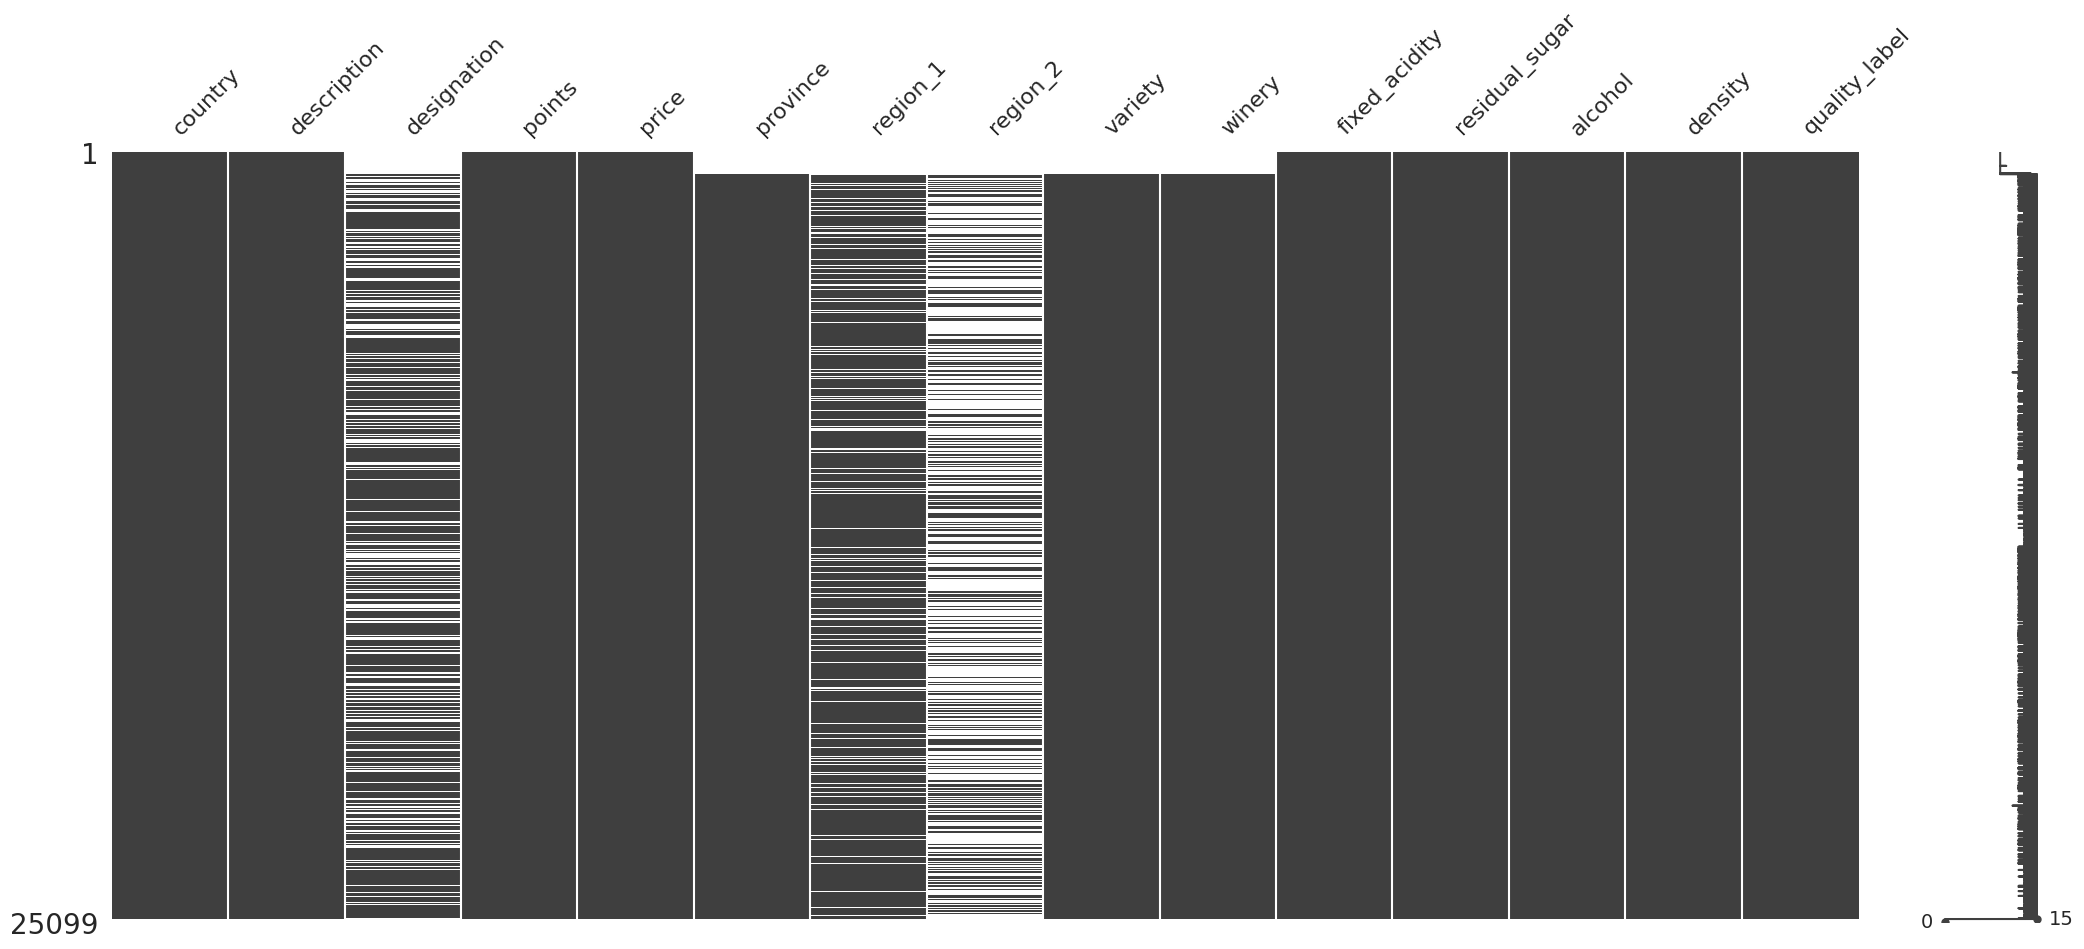

In [25]:
# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

> # Step 02: Remoção de Linhas Nulas

Neste passo, vamos remover do dataset todas as linhas que estão completamente vazias, ou seja, onde todas as colunas têm valores ausentes (nulos).

In [26]:
# Conta antes
linhas_antes = missing_df.shape[0]

# Remove linhas 100% vazias
missing_df.dropna(how='all', inplace=True)

# Conta depois
linhas_depois = missing_df.shape[0]

# Exibe o resultado
print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 25099
Linhas depois: 25001
Linhas removidas: 98


> # Step 03: Identificação de Nulos

Neste step, vamos identificar e quantificar os valores ausentes presentes em cada variável do dataset, após a remoção das linhas totalmente nulas realizada no passo anterior.

<Axes: >

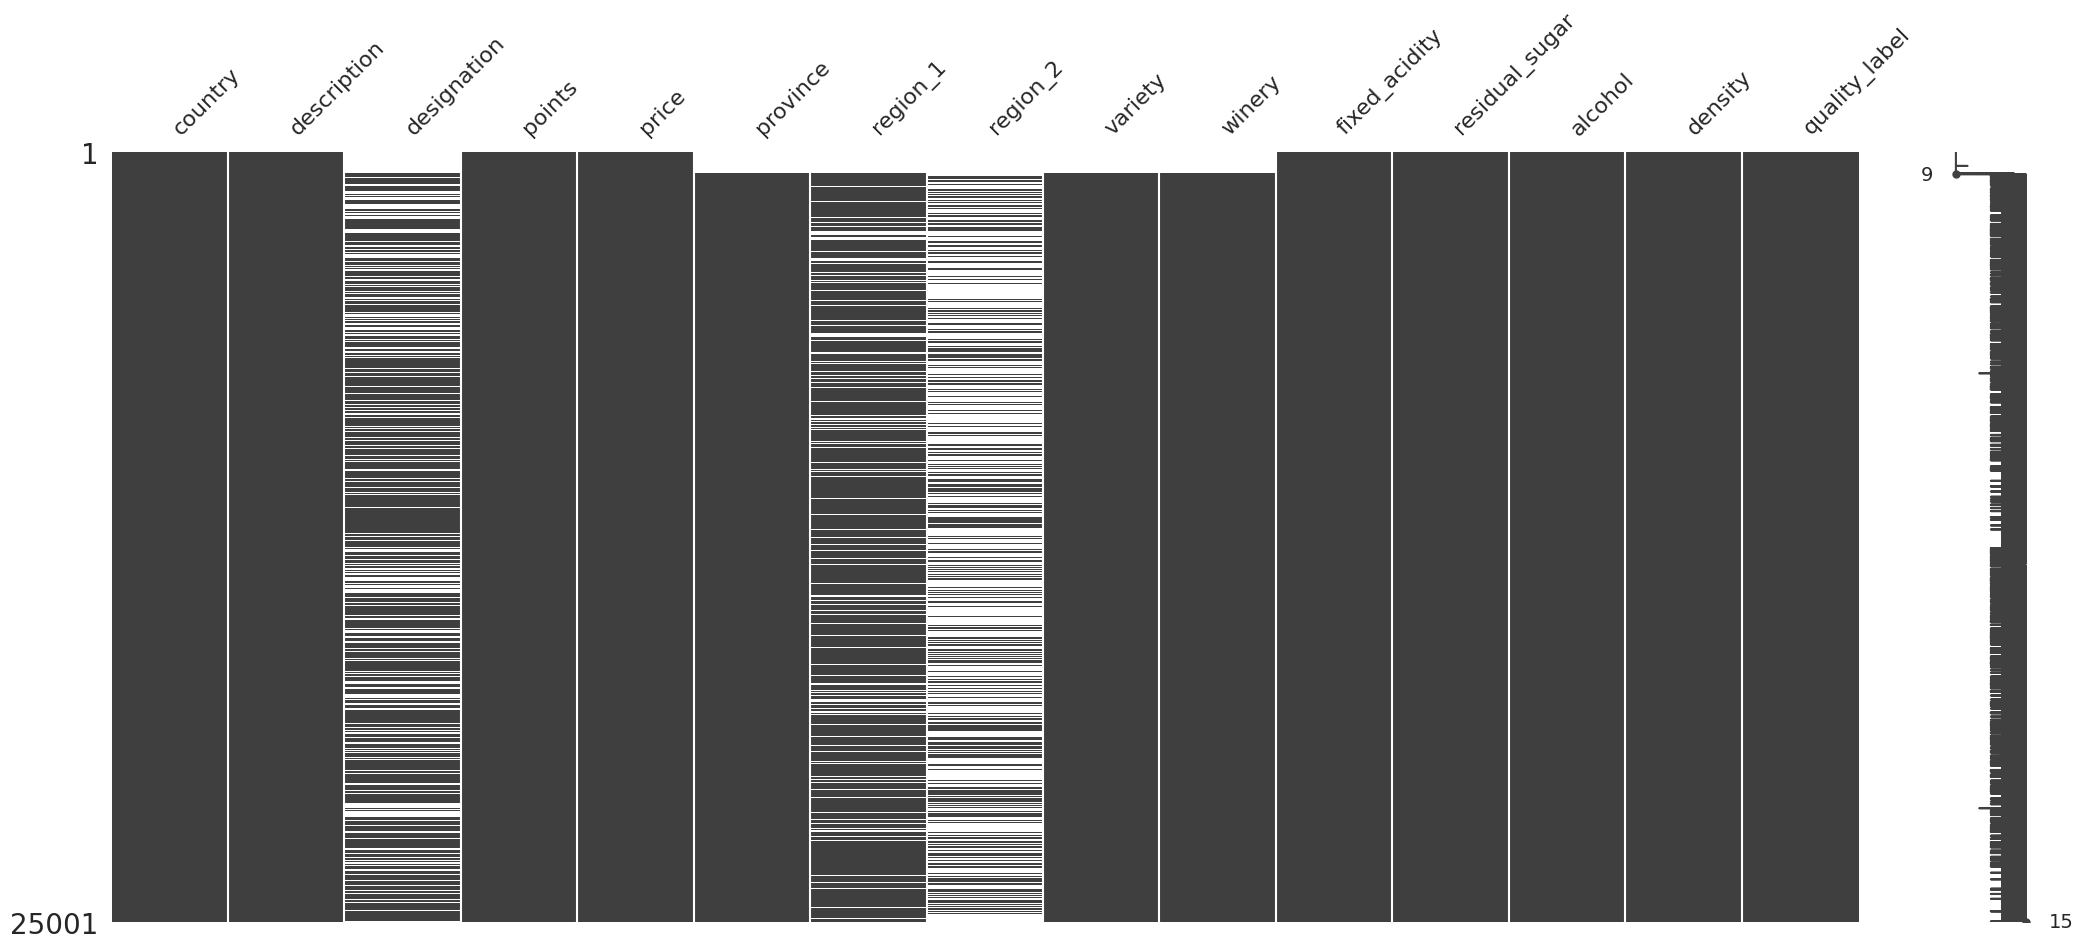

In [27]:
# recuperando os nomes das colunas
col = list(missing_df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = missing_df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [28]:
# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
region_2                 15590   62.114028
designation               7822   31.164588
region_1                  4492   17.897127
province                   724    2.884577
variety                    722    2.876609
winery                     722    2.876609
country                      2    0.007968
points                       0    0.000000
price                        0    0.000000
description                  0    0.000000
fixed_acidity                0    0.000000
residual_sugar               0    0.000000
alcohol                      0    0.000000
density                      0    0.000000
quality_label                0    0.000000


> # Step 04: Preenchimento de Valores

Neste step, vamos tratar os valores ausentes (missing values) do  dataset. Com o objetivo de evitar problemas na criação dos modelos preditivos.

In [67]:
# Categóricas
missing_df['designation'] = missing_df['designation'].fillna('Sem Designação')
missing_df['country']     = missing_df['country'].fillna('Desconhecido')
missing_df['province']    = missing_df['province'].fillna('Desconhecido')
missing_df['region_1']    = missing_df['region_1'].fillna('Não Informada')
missing_df['region_2']    = missing_df['region_2'].fillna('Não Informada')
missing_df['variety']     = missing_df['variety'].fillna('Outra')
missing_df['winery']      = missing_df['winery'].fillna('Desconhecida')

# Numéricas
missing_df['points'] = missing_df['points'].fillna(missing_df['points'].median())
missing_df['price']  = missing_df['price'].fillna(30)

> # Step 05: Identificação de Nulos

Nesse Step vamos verificar se ainda existem valores ausentes em alguma  variavel do dataset, após os tratamentos de nulos aplicados nos steps anteriores.

<Axes: >

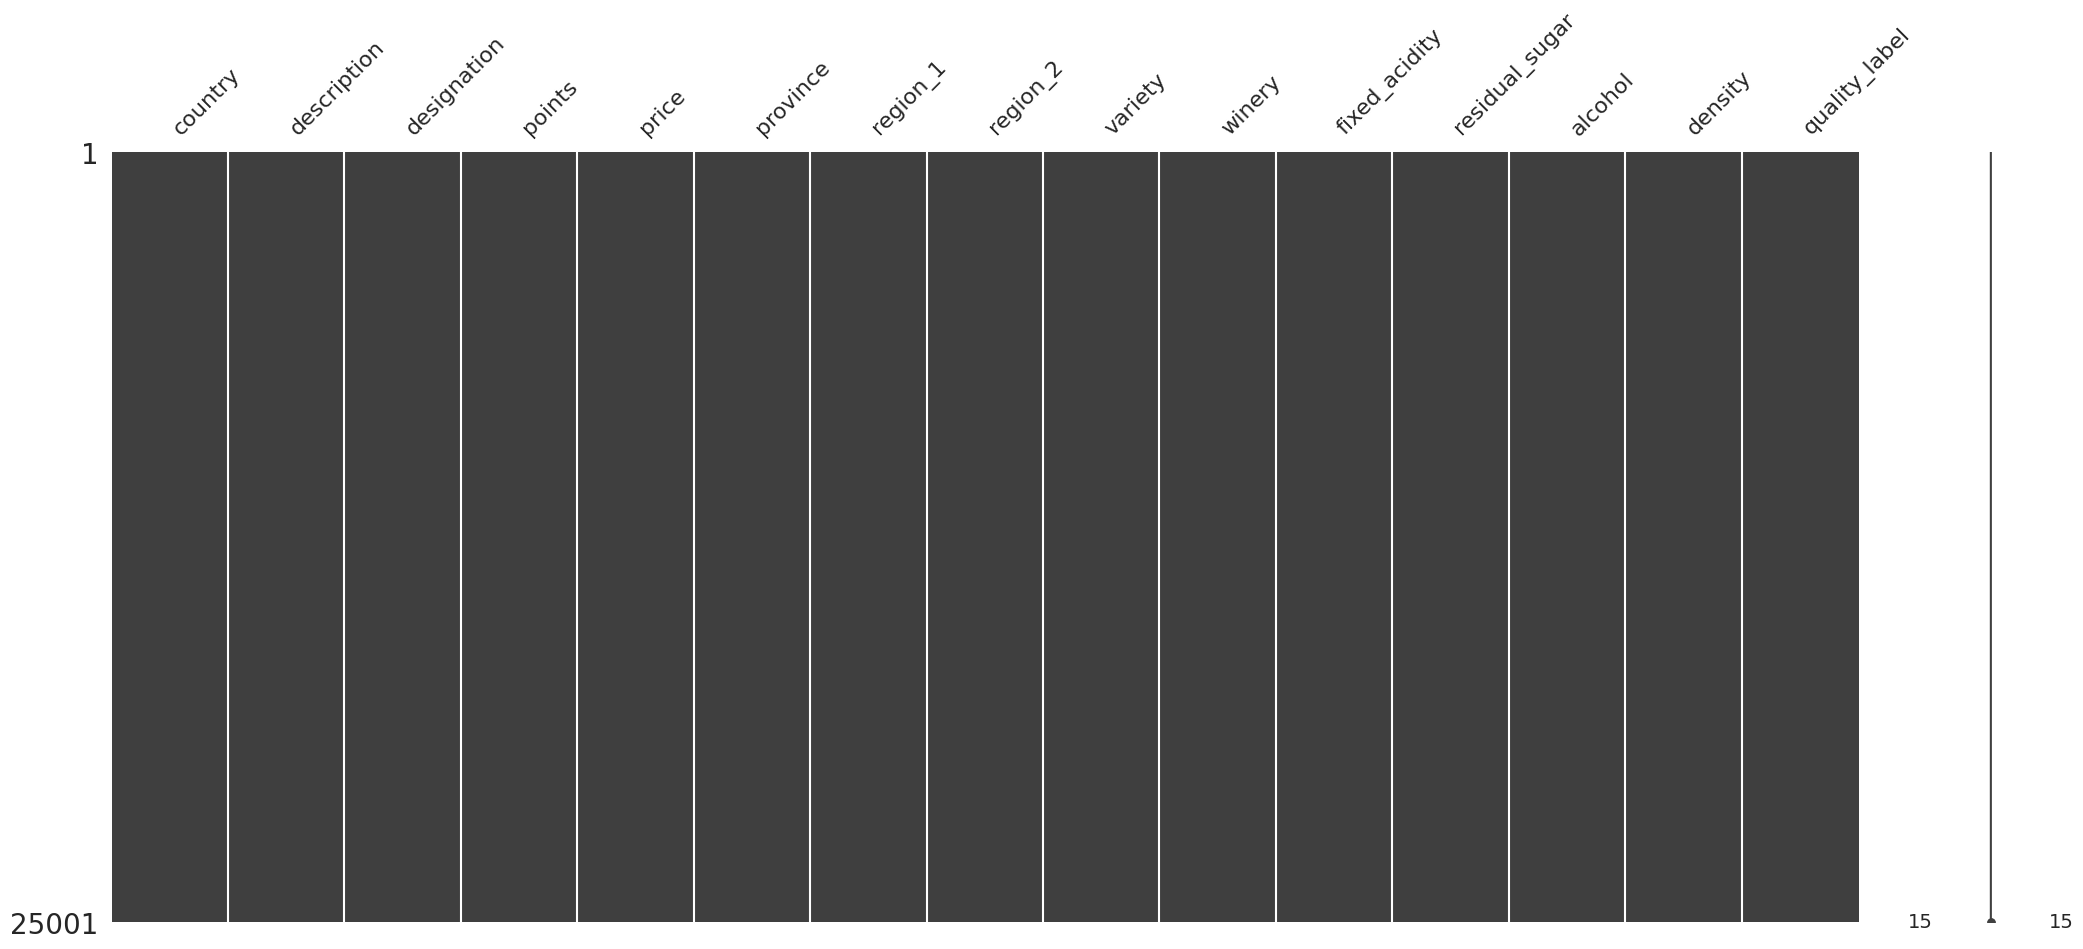

In [30]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [31]:

# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

                Missing Values  % do Total
country                      0         0.0
description                  0         0.0
designation                  0         0.0
points                       0         0.0
price                        0         0.0
province                     0         0.0
region_1                     0         0.0
region_2                     0         0.0
variety                      0         0.0
winery                       0         0.0
fixed_acidity                0         0.0
residual_sugar               0         0.0
alcohol                      0         0.0
density                      0         0.0
quality_label                0         0.0


> # Step 06: Atualização do DataSet Original

Nesse passo estamos atribuindo as mudanças feitas no dataset missing_df para o dataset original df.


In [32]:
df = missing_df.copy()

> # Step 07: Redundancias

Neste passo, vamos identificar e tratar possíveis dados redundantes no dataset, informações duplicadas ou variáveis que trazem a mesma informação de formas diferentes. Com o objetivo de evitar vieses, reduzir complexidade e melhorar a performance dos modelos nas análises.


In [33]:
#Tratamento de valores ausentes:

## Remover duplicatas
df.drop_duplicates(inplace=True)


> # Step 08: Outliers

Neste passo, vamos identificar e tratar os outliers do dataset, que são valores atípicos, extremos que distorcem as análises e modelos. Vamos ajustar o dataset para que os dados estejam consistentes e que os outliers não prejudiquem a qualidade das análises e predições.

In [34]:
# Lista de colunas numéricas para tratamento de outliers
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol','density']

# Inicializa uma máscara booleana (começa com todos True)
mask = pd.Series(True, index=df.index)

# Para cada coluna, aplica a regra do IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df[col].between(lower, upper)

# Aplica a máscara: mantém apenas as linhas válidas
df_sem_outliers = df[mask]

# Guarda os outliers descartados
outliers_df = df[~mask]

# Exibe exemplos de outliers removidos
print("="*60)
print(f"Foram identificadas e removidas {len(outliers_df)} linhas de outliers.")
print("="*60)


#df = df_sem_outliers.copy()

Foram identificadas e removidas 0 linhas de outliers.


# 4.2 Preparação e Transformação de dados

> # Step 01: Novas Caracteristicas

Neste step, vamos criar novas variáveis partindo dos dados originais para melhorar o dataset e aumentar o poder preditivo dos modelos.
Com o objetivo de Aumentar a informação disponível para o modelo, provendo dados que não estavam explícitos nas variáveis originais.

In [35]:
#novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 100:
        return 'baixo'
    elif preco <= 500:
        return 'médio'
    else:
        return 'alto'

df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['alcohol_density_ratio'] = df['alcohol'] / df['density']


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25001 entries, 0 to 25000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                25001 non-null  object 
 1   description            25001 non-null  object 
 2   designation            25001 non-null  object 
 3   points                 25001 non-null  float64
 4   price                  25001 non-null  float64
 5   province               25001 non-null  object 
 6   region_1               25001 non-null  object 
 7   region_2               25001 non-null  object 
 8   variety                25001 non-null  object 
 9   winery                 25001 non-null  object 
 10  fixed_acidity          25001 non-null  float64
 11  residual_sugar         25001 non-null  float64
 12  alcohol                25001 non-null  float64
 13  density                25001 non-null  float64
 14  quality_label          25001 non-null  object 
 15  price_r

> # Step 02: Redução de Dimensionalidade

Nesse step, vamos reduzir o número de variáveis, mantendo as informações mais relevantes para simplificar o modelo.
Com o obejetivo de diminuir a complexidade do modelo, facilitando a interpretação.

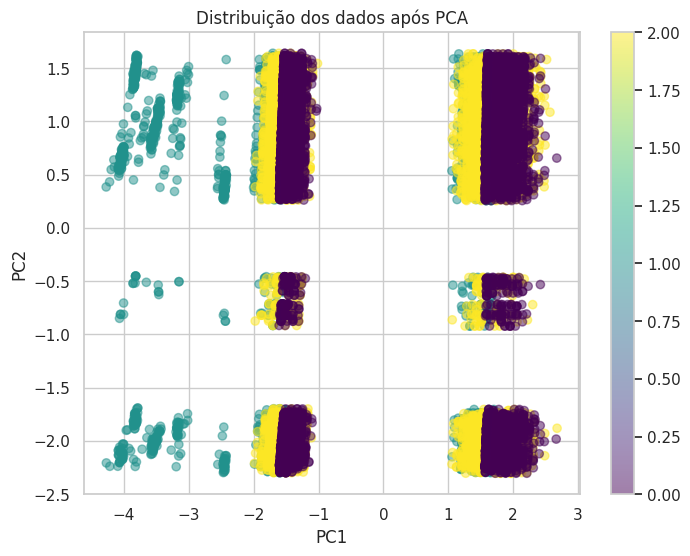

In [36]:
# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Selecionar apenas colunas numéricas válidas
X_numeric = df[numeric_cols].copy()


# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

> # Step 03: Categorização de Variáveis

Neste step, vamos fazer a transforção das variáveis categoricas para formatos apropriados ao modelo, convertendo elas em numeros e agrupando variáveis contínuas quando necessário. Com o Objetivo de garantir compatibilidade dos dados com os algoritmos e melhorar o desempenho dos modelos.

In [37]:
# Conversão de colunas categóricas em códigos numéricos para visualização ou modelagem
for col in ['country', 'designation', 'province', 'region_1', 'region_2',
            'variety', 'winery', 'price_range', 'quality_label', 'full_region']:
    df[f'{col}_code'] = LabelEncoder().fit_transform(df[col])



In [ ]:
    df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,country_code,designation_code,province_code,region_1_code,region_2_code,variety_code,winery_code,price_range_code,quality_label_code,full_region_code
0,Chile,"Kind of dull on the nose, with white pepper bu...",Sem Designação,5.0,28.4,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8,8585,73,508,11,259,2581,1,1,402
1,France,Marked by soft tannins yet surprisingly crisp ...,Sem Designação,5.0,28.2,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,13,8585,73,508,11,259,2581,1,1,402
2,Argentina,"Giant and black, with extracted but pruney aro...",Sem Designação,5.0,28.1,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,1,8585,73,508,11,259,2581,1,1,402
3,US,This bottling resembles the New Zealand paradi...,Sem Designação,5.0,28.6,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,36,8585,73,508,11,259,2581,1,1,402
4,Spain,"A ripe and rich style, with black cherry, rais...",Sem Designação,5.0,28.1,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,33,8585,73,508,11,259,2581,1,1,402


# Step 04: Preparação dos Dados para Modelagem

In [61]:
# Lista correta das colunas desejadas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

#Seleciona apenas as colunas desejadas como features
X = df[numeric_cols].copy()

# Define a variável alvo
y = df['quality_label'].copy()

# Divide os dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Exibe as dimensões
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (17500, 6)
Dimensões de X_test: (7501, 6)
Dimensões de y_train: (17500,)
Dimensões de y_test: (7501,)


> # Step 05: Normalização

Nesse step, vamos ajustar as variáveis para escalas comuns, evitando que diferenças de faixa de valores atrapalhem a análise.
Com o Obejtivo de colocar todas as variáveis em uma mesma escala para que tenham influência equilibrada no modelo.



In [63]:
# Lista correta das colunas desejadas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Seleciona apenas essas colunas
X_train_selected = X_train[numeric_cols].copy()
X_test_selected = X_test[numeric_cols].copy()

# Inicializa o scaler
scaler = MinMaxScaler()

# Ajusta e transforma
scaler.fit(X_train_selected)
X_train_normalized = scaler.transform(X_train_selected)
X_test_normalized = scaler.transform(X_test_selected)

# Converte para DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=numeric_cols, index=X_train.index)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=numeric_cols, index=X_test.index)

# Exibe as primeiras linhas
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(X_train_normalized_df.head())



Primeiras 5 linhas dos dados normalizados (treino):
         points     price  fixed_acidity  residual_sugar   alcohol  \
22030  0.905263  0.743542       0.300000        0.413793  0.900000   
7595   0.421053  0.075150       0.858333        0.827586  0.233333   
11254  0.915789  0.768220       0.966667        0.393103  0.266667   
11018  0.905263  0.741664       0.433333        0.427586  0.100000   
15367  0.400000  0.065293       0.333333        0.041379  0.566667   

            density  
22030  9.985072e-01  
7595   9.965167e-01  
11254  1.293789e-07  
11018  3.980888e-07  
15367  9.986067e-01  


> # Step 06: Visualização da distribuição após a normalização

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuiram após a normalização.

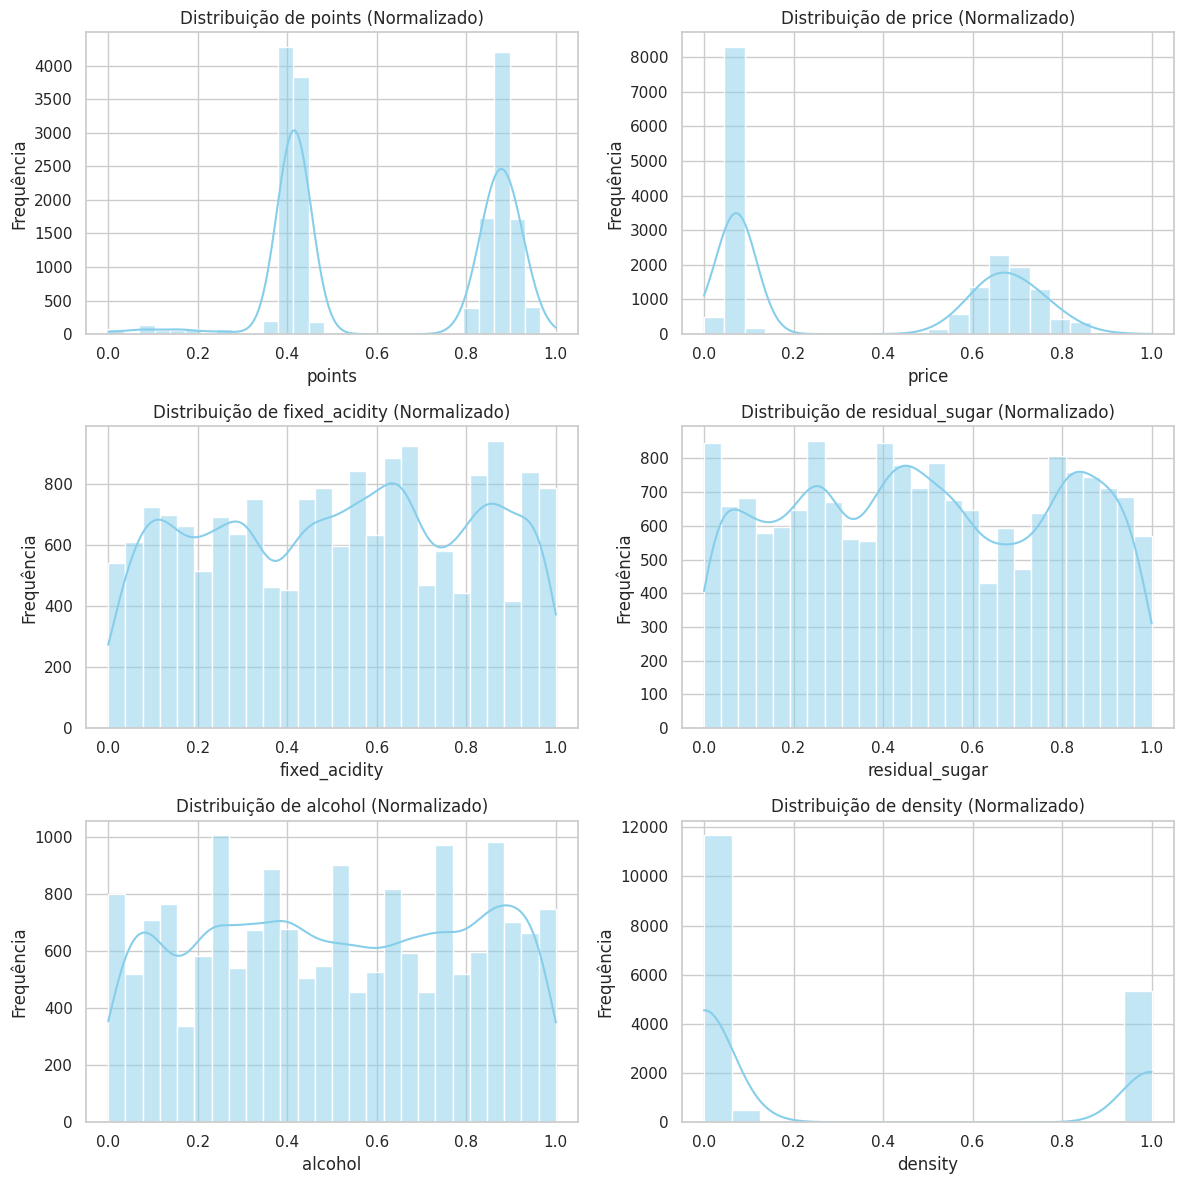

In [66]:
# Lista das colunas normalizadas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Usa o DataFrame com dados normalizados (ex: X_train_normalized_df)
cols = numeric_cols
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train_normalized_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Normalizado)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

** Conclusão: **

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 07: Padronização

Nesse Step xxxxxxxxxxxxxxxxxxxx

In [68]:
# Lista das colunas a padronizar
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Seleciona os dados numéricos originais (não normalizados)
X_train_selected = X_train[numeric_cols].copy()
X_test_selected = X_test[numeric_cols].copy()

# Inicializa o padronizador
scaler_std = StandardScaler()

# Ajusta no treino e transforma
scaler_std.fit(X_train_selected)

X_train_standardized = scaler_std.transform(X_train_selected)
X_test_standardized = scaler_std.transform(X_test_selected)

# Converte para DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=numeric_cols, index=X_train.index)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=numeric_cols, index=X_test.index)

# Exibe as primeiras linhas
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(X_train_standardized_df.head())


Primeiras 5 linhas dos dados padronizados (treino):
         points     price  fixed_acidity  residual_sugar   alcohol   density
22030  1.109228  1.208770      -0.748058       -0.280757  1.344161  1.513562
7595  -0.859617 -0.939182       1.194617        1.140476 -0.932193  1.509210
11254  1.152029  1.288077       1.571554       -0.351819 -0.818375 -0.669460
11018  1.109228  1.202736      -0.284136       -0.233383 -1.387463 -0.669459
15367 -0.945219 -0.970860      -0.632078       -1.559868  0.205984  1.513779


> # Step 08: Visualização da distribuição após a padronização

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuiram após a padronização.

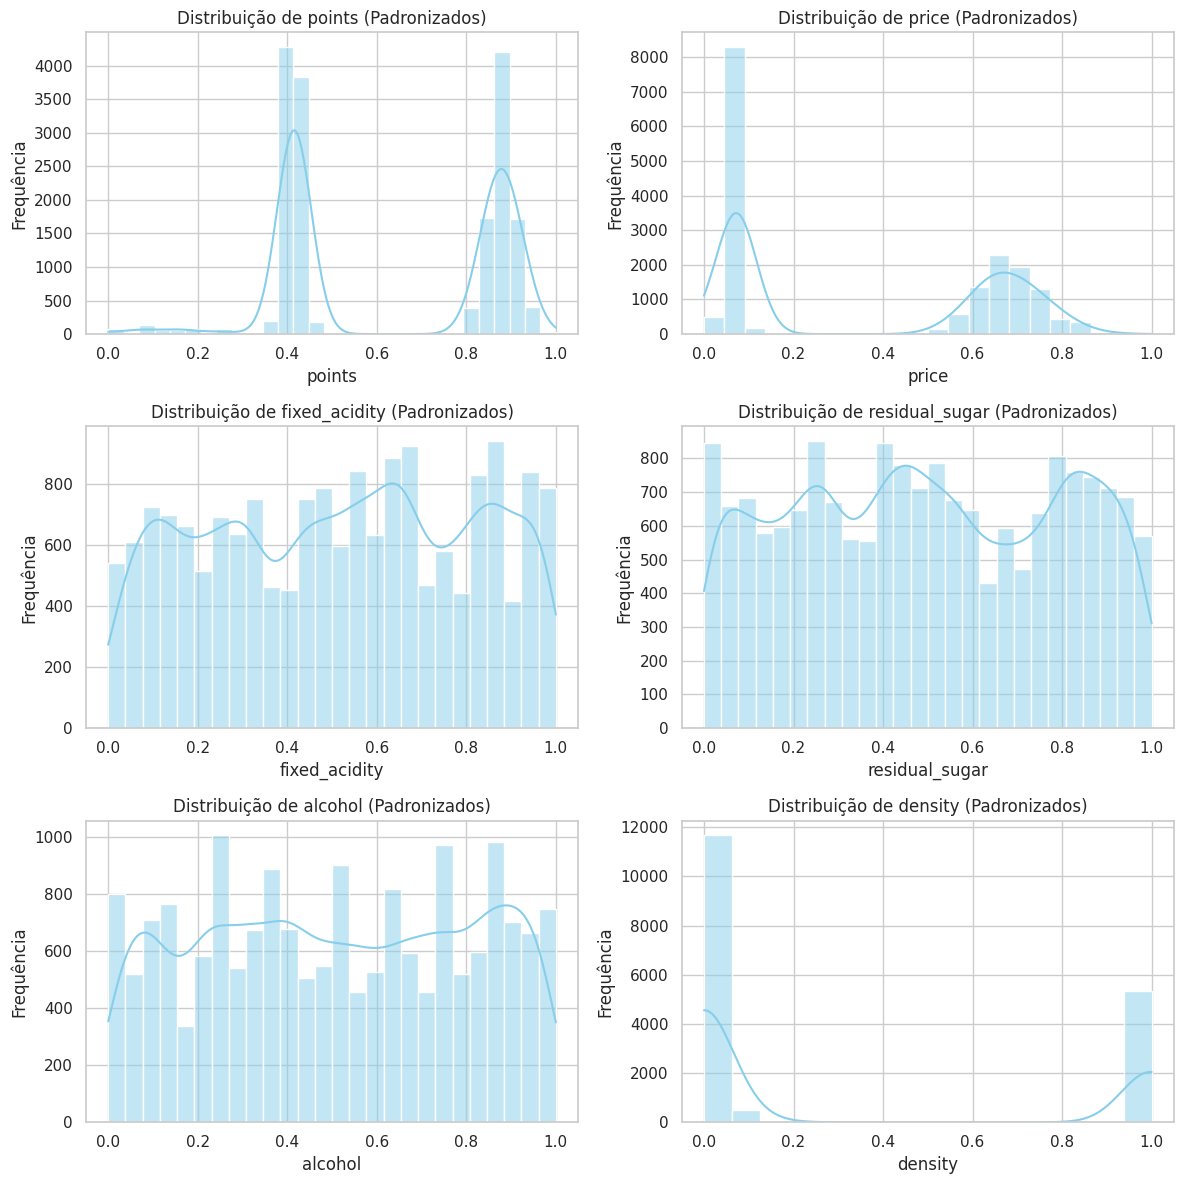

In [70]:
# Lista das colunas padronizadas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Usa o DataFrame com dados padronizados (ex: X_train_normalized_df)
cols = numeric_cols
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train_normalized_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Padronizados)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> # Step 09: Comparativo Após Normalização e Padronização

Nesse Step vamos xxx

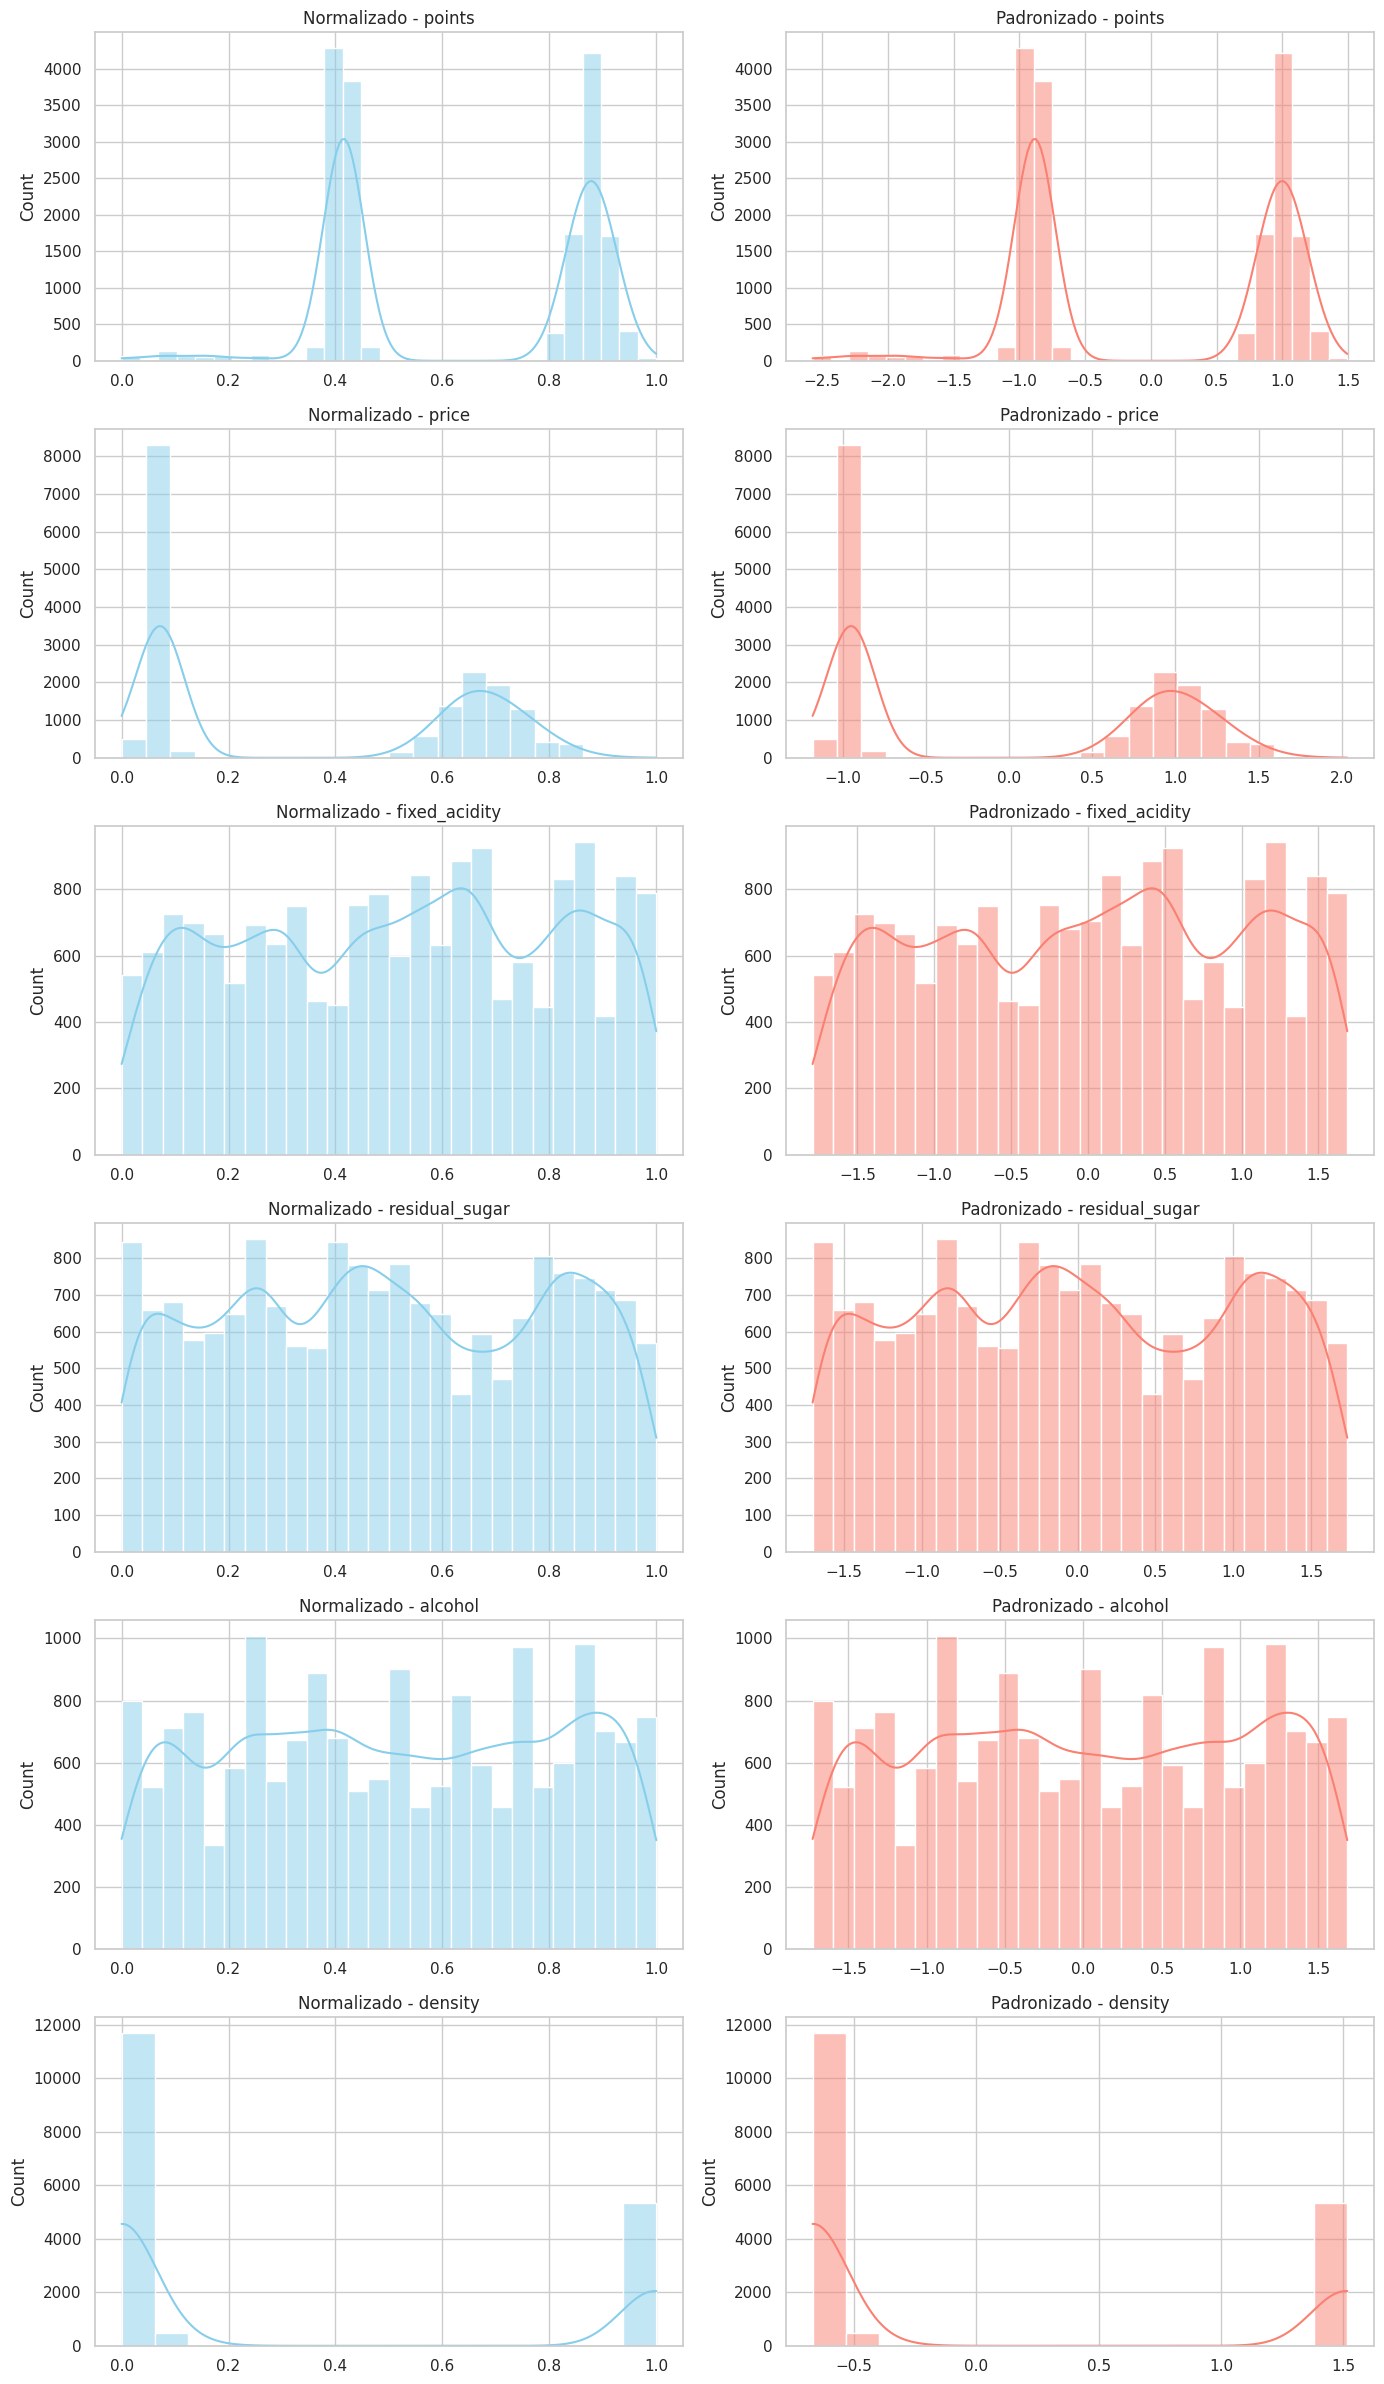

In [71]:
# Lista das colunas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

n_cols = 2
n_rows = len(numeric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Gráfico da Normalização
    sns.histplot(X_train_normalized_df[col], kde=True, ax=axes[2*i], color='skyblue')
    axes[2*i].set_title(f'Normalizado - {col}')
    axes[2*i].set_xlabel('')

    # Gráfico da Padronização
    sns.histplot(X_train_standardized_df[col], kde=True, ax=axes[2*i+1], color='salmon')
    axes[2*i+1].set_title(f'Padronizado - {col}')
    axes[2*i+1].set_xlabel('')

# Ajuste do layout
plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Conclusão</p>

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.